In [1]:
import sympy as sp
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt

sp.init_printing(use_unicode = True)

Kiindulási adatok megadása

In [2]:
L, F, IE = sp.symbols("L, F, IE")
adat = [(L, 3.0), (F,7000.0), (IE, 200e3)]

# 1. Reakcióerők számítása

A lehetséges reakcióerők a megtámasztásokból adódóan: Ax, Ay, By

In [3]:
Ax, Ay, By = sp.symbols("Ax, Ay, By")

A 3 statikai egyenlet ( két erő-egyensúlyi egyenlet és 1 nyomatéki egyenlet például az A pontra felírva):

In [4]:
stat1 = Ax
stat2 = Ay + By - F
stat3 = By*L/2 - F*L

Hajlítónyomatéki függvények mindkét szakaszon:

In [5]:
x = sp.Symbol('x')

Mh1 = -Ay*x
Mh2 = -Ay*x - By*(x-L/2)

# 2. Rugalmas szál differenciálegyenlete

A rugalmas szál diffegyenlete a két szakaszon: $$y_1{}''\left(x\right)=-\dfrac{M_{\mathrm{h1}}(x)}{IE}$$ és $$y_2{}''(x)=-\dfrac{M_{\mathrm{h2}}(x)}{IE}$$. Itt most $y_1(x)$ és $y_2(x)$ függvények jelölik a lehajlásokat.

A lehajlásfüggvények számításához kétszer kell integrálni nem elfeledkezve az integrálási konstansokról!
Legyen $\varphi_1(x)=y_1{}'(x)$ függvénnyel jelölve a
szögelfordulás függvény.

In [6]:
c1, c2, c3, c4 = sp.symbols("c1 c2 c3 c4")

φ1 = sp.integrate(-Mh1/IE,x) + c1
y1 = sp.integrate(φ1,x) + c2

φ2 = sp.integrate(-Mh2/IE,x) + c3
y2 = sp.integrate(φ2,x) + c4

Az ismeretlen $c_1,c_2,c_3,c_4$ kiszámításához szükség van az illesztési és peremfeltételek megadására.

Jelen esetben van két peremfeltételünk, miszerint az A és B helyeken a
lehajlás zérus.
Valamint van két illesztési feltételünk, hogy az $y_1$ és $y_2$ függvények értékei és első deriváltjai azonosak a B helyen.

In [7]:
pf1 = y1.subs([(x,0)])
pf2 = y1.subs([(x,L/2)])

if1 = (y1 - y2).subs([(x,L/2)])
if2 = (φ1 - φ2).subs([(x,L/2)])

Megoldás számítása

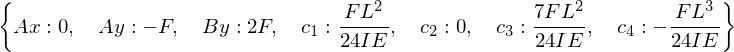

In [8]:
ismeretlenek = [Ax,Ay,By,c1,c2,c3,c4]
mego = sp.solve([stat1,stat2,stat3,pf1,pf2,if1,if2],ismeretlenek)
mego

y1=


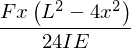



y2=


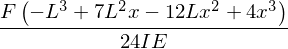



φ1=


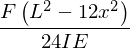



φ2=


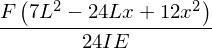

In [9]:
print('y1=')
display(y1.subs(mego).simplify())
print('\n\ny2=')
display(y2.subs(mego).simplify())
print('\n\nφ1=')
display(φ1.subs(mego).simplify())
print('\n\nφ2=')
display(φ2.subs(mego).simplify())

@Tomi: ez kell?
[Mi legyen, hogy legyen?](https://docs.sympy.org/latest/modules/numeric-computation.html)

A numerikus vizsgálatokhoz helyettesítsünk vissza, és készítsünk a szimbolikus függvényből numerikus függvényt:

In [10]:
y1num = sp.lambdify(x,y1.subs(mego).subs(adat))
y1num(x)

In [11]:
y2num = sp.lambdify(x,y2.subs(mego).subs(adat))
y2num(x)

In [12]:
φ1num = sp.lambdify(x,φ1.subs(mego).subs(adat))
φ1num(x)

In [13]:
φ2num = sp.lambdify(x,φ2.subs(mego).subs(adat))
φ2num(x)

# 3. Ábrázolás

Ábrázoljuk mindkét lehajlás függvényt

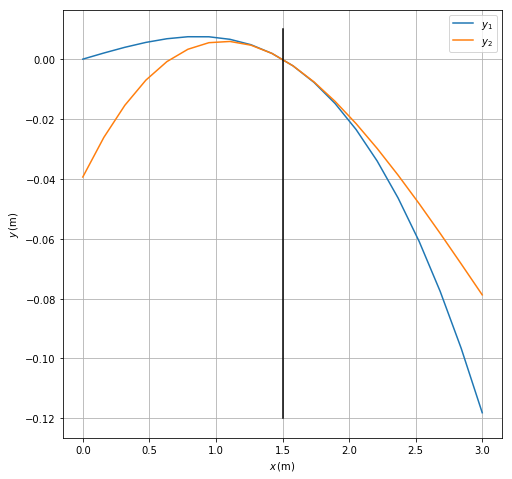

In [14]:
xs = sc.linspace(0,3,20)
plt.figure(num = 1, figsize=(20/2.54,20/2.54))

plt.plot(xs,y1num(xs), label = r"$y_1$")
plt.plot(xs,y2num(xs), label = r"$y_2$")

plt.plot([L.subs(adat)/2,L.subs(adat)/2],[-0.12,0.01], color = 'k')

plt.xlabel(r"$x \, (\mathrm{m})$")
plt.ylabel(r"$y \, (\mathrm{m})$")

plt.legend()
plt.grid()
plt.show()

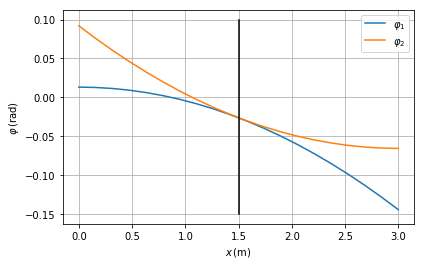

In [15]:
plt.figure(num = 2, figsize=(16/2.54,10/2.54))

plt.plot(xs,φ1num(xs), label = r"$\varphi_1$")
plt.plot(xs,φ2num(xs), label = r"$\varphi_2$")

plt.plot([L.subs(adat)/2,L.subs(adat)/2],[-0.15,0.1], color = 'k')

plt.xlabel(r"$x \, (\mathrm{m})$")
plt.ylabel(r"$\varphi \, (\mathrm{rad})$")

plt.grid()
plt.legend()
plt.show()

Látható, hogy a B helyen az értékük és deriváltjaiknak értéke is azonos. Ábrázoljuk a függvényeket csak a rájuk vonatkozó tartományokon:

In [16]:
def ykozos(x):
    if x < L.subs(adat)/2:
        return y1num(x)
    else:
        return y2num(x)
ykozoslist = [ykozos(x) for x in xs]

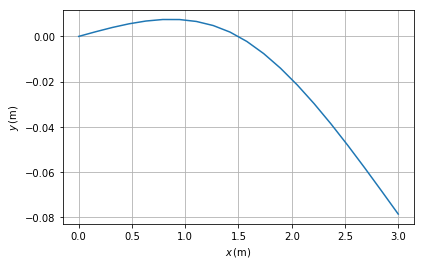

In [17]:
plt.figure(num = 1, figsize=(16/2.54,10/2.54))
plt.plot(xs,ykozoslist)

plt.ylabel(r"$y \, (\mathrm{m})$")
plt.xlabel(r"$x \, (\mathrm{m})$")
plt.grid()
plt.show()

Nézzük meg hasonlóképpen a szögelfordulás függvényt:

In [18]:
def φkozos(x):
    if x < L.subs(adat)/2:
        return φ1num(x)
    else:
        return φ2num(x)
φkozoslist = [φkozos(x) for x in xs]

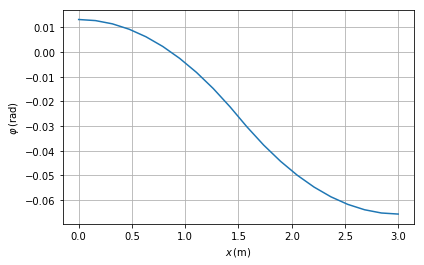

In [19]:
plt.figure(figsize=(16/2.54,10/2.54))
plt.plot(xs,φkozoslist)

plt.ylabel(r"$\varphi \, (\mathrm{rad})$")
plt.xlabel(r"$x \, (\mathrm{m})$")
plt.grid()
plt.show()

# 4. Szélsőérték számítása az AB szakaszon

Látható, hogy az AB szakaszon szélsőértéke van egy ismeretlen $x_0$ helyen a lehajlásfüggvénynek. Ezen a helyen a szögelfordulás zérus. Tehát $x_0$ könnyen
számítható:

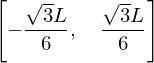

In [20]:
x0mego = sp.solve(φ1.subs(mego),x)
x0mego

In [21]:
sp.N(x0mego[1].subs(adat))

A kapott megoldásokból a pozitív érték adja x0 értékét. Ezt akár numerikusan is számíthatjuk gyökkereséssel:

In [22]:
import scipy.optimize as sco

In [23]:
x0 = sco.brentq(φ1num,0,L.subs(adat)/2)
x0

$x_0$ helyen a lehajlás értéke:

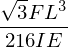

In [24]:
y1.subs(mego).subs([(x,x0mego[1])])

In [25]:
sp.N(y1.subs(mego).subs([(x,x0mego[1])]).subs(adat))

vagy:

In [26]:
y1num(x0)